In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data_superstore.csv", encoding='latin1')

# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())

# Display the first five rows
df.head()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   flo

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


2. DATA CLEANING

2.1 Handle Missing Values

In [3]:
# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64


In [4]:
# Impute missing values for numeric columns using median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Impute missing values for categorical columns using mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
dtype: int64


2.2 Remove Duplicate Records

In [5]:
# Count duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate records
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Number of duplicate rows: 0
Shape after removing duplicates: (9800, 18)


2.3 Detect and Treat Outliers

In [6]:
def remove_outliers(data, col):
    # Remove outliers from a column using the IQR method.
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Remove outliers for each numerical column
initial_shape = df.shape
for col in numeric_cols:
    df = remove_outliers(df, col)
print("Shape after outlier removal:", df.shape)
print("Rows removed:", initial_shape[0] - df.shape[0])

Shape after outlier removal: (8655, 18)
Rows removed: 1145


2.4 Standardize Categorical Values

In [7]:
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

# Optional: Inspect unique values in one of the categorical columns (e.g., 'category')
if 'category' in df.columns:
    print("Unique values in 'category':", df['category'].unique())


----------------------------------------------------------------------------------------------------------------------------

3. Exploratory Data Analysis (EDA)

3.1 Univariate Analysis

In [8]:
# Summary statistics for numerical columns
print("Descriptive Statistics:")
print(df[numeric_cols].describe())

# Compute additional statistics: median, mode, skewness, and variance
print("\nMedian values:")
print(df[numeric_cols].median())

print("\nMode values:")
print(df[numeric_cols].mode().iloc[0])

print("\nSkewness:")
print(df[numeric_cols].skew())

print("\nVariance:")
print(df[numeric_cols].var())

Descriptive Statistics:
            Row_ID   Postal_Code        Sales
count  8655.000000   8655.000000  8655.000000
mean   4916.320508  55428.931485    93.213330
std    2830.949018  31949.097021   114.693292
min       1.000000   1040.000000     0.444000
25%    2454.500000  23320.000000    15.014000
50%    4925.000000  60025.000000    40.880000
75%    7362.500000  90004.000000   124.382000
max    9800.000000  99301.000000   500.240000

Median values:
Row_ID          4925.00
Postal_Code    60025.00
Sales             40.88
dtype: float64

Mode values:
Row_ID             1.00
Postal_Code    10035.00
Sales             12.96
Name: 0, dtype: float64

Skewness:
Row_ID        -0.007379
Postal_Code   -0.138479
Sales          1.685267
dtype: float64

Variance:
Row_ID         8.014272e+06
Postal_Code    1.020745e+09
Sales          1.315455e+04
dtype: float64


In [9]:
# Frequency distributions for each categorical variable
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Value counts for 'Order_ID':
Order_ID
ca-2018-157987    11
ca-2018-100111    11
us-2017-108504    11
ca-2017-165330    10
ca-2017-145177     9
                  ..
ca-2017-121601     1
ca-2015-123127     1
ca-2016-136735     1
us-2018-136189     1
ca-2016-109708     1
Name: count, Length: 4641, dtype: int64

Value counts for 'Order_Date':
Order_Date
5/9/2017      36
10/11/2017    33
1/12/2018     31
9/12/2018     30
2/9/2018      29
              ..
26/04/2017     1
24/04/2016     1
15/03/2016     1
6/1/2018       1
9/5/2016       1
Name: count, Length: 1217, dtype: int64

Value counts for 'Ship_Date':
Ship_Date
16/12/2016    29
15/09/2018    28
26/09/2018    28
21/11/2018    27
6/12/2018     26
              ..
6/2/2016       1
25/02/2016     1
1/8/2016       1
22/07/2018     1
13/05/2016     1
Name: count, Length: 1309, dtype: int64

Value counts for 'Ship_Mode':
Ship_Mode
standard class    5186
second class      1671
first class       1325
same day           473
Name: count, dtype:

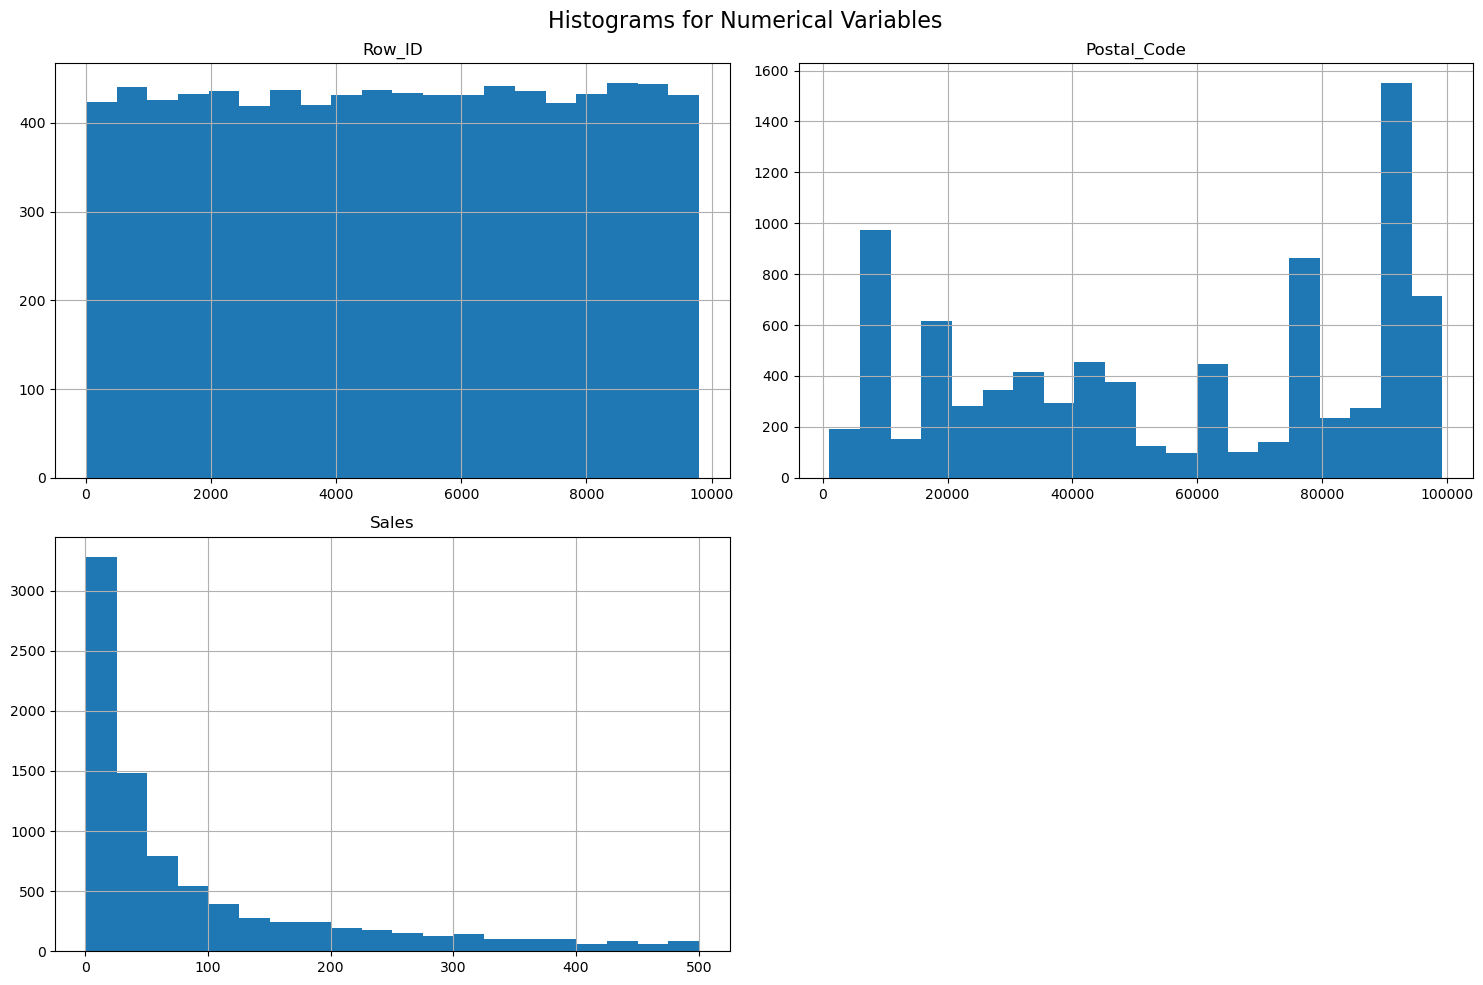

In [10]:
# Histograms for numerical variables
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms for Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()

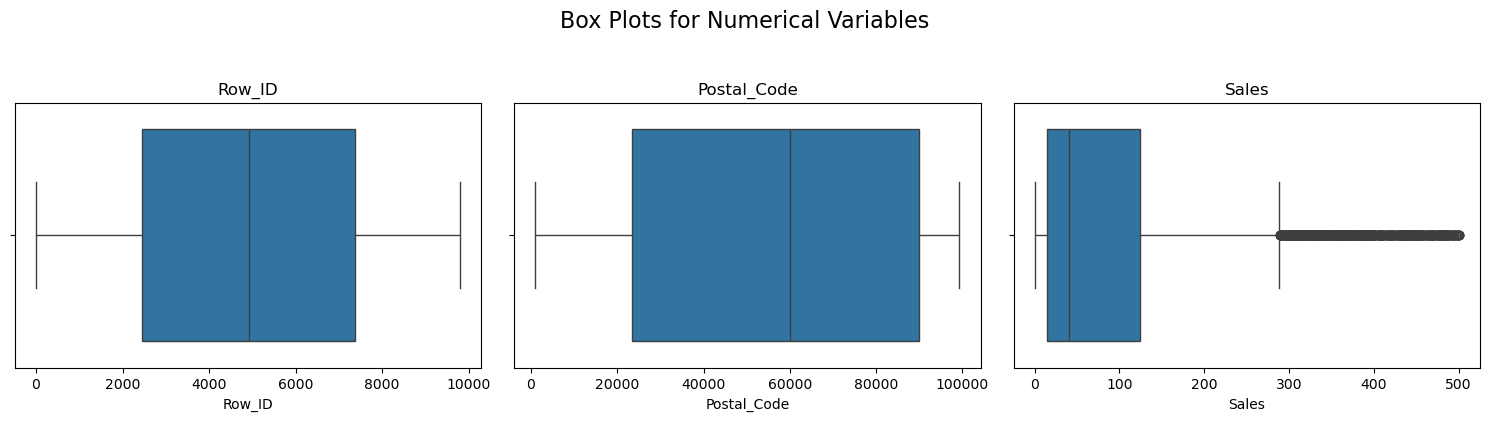

In [11]:
# Box plots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.suptitle("Box Plots for Numerical Variables", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

3.2 Bivariate Analysis

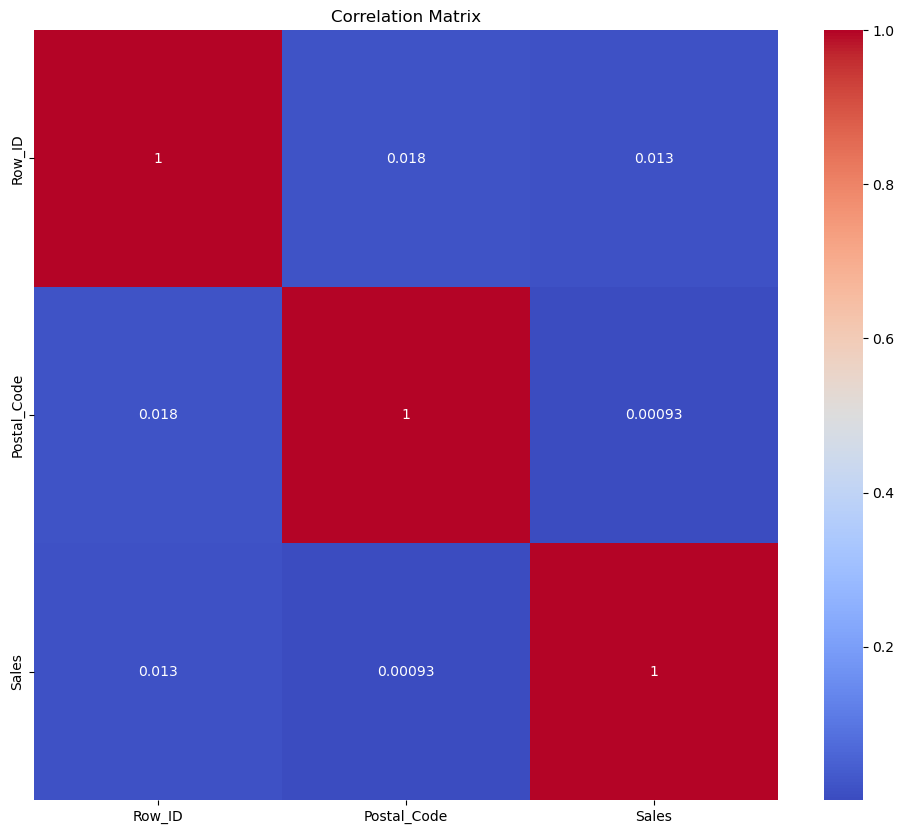

In [12]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

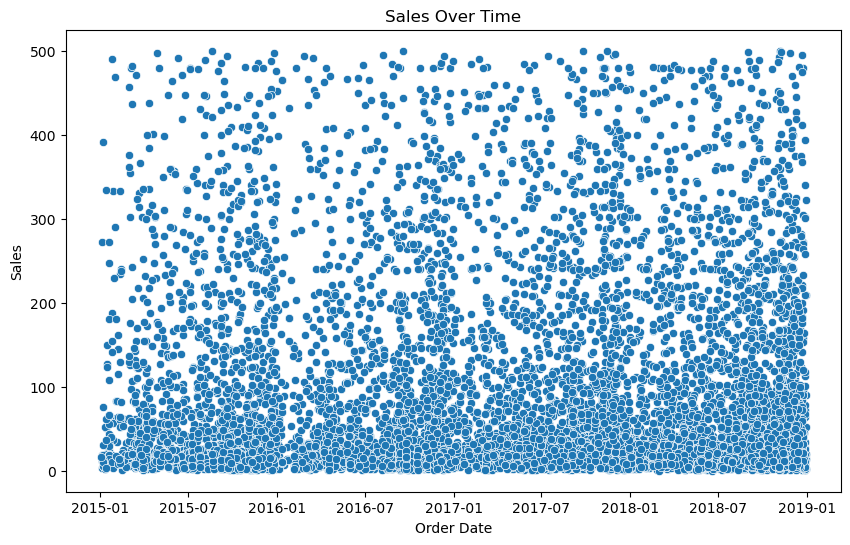

In [13]:
# Convert Order_Date to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)


# Create a scatter plot for Sales vs Order_Date
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order_Date', y='Sales', data=df)
plt.title("Sales Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.show()




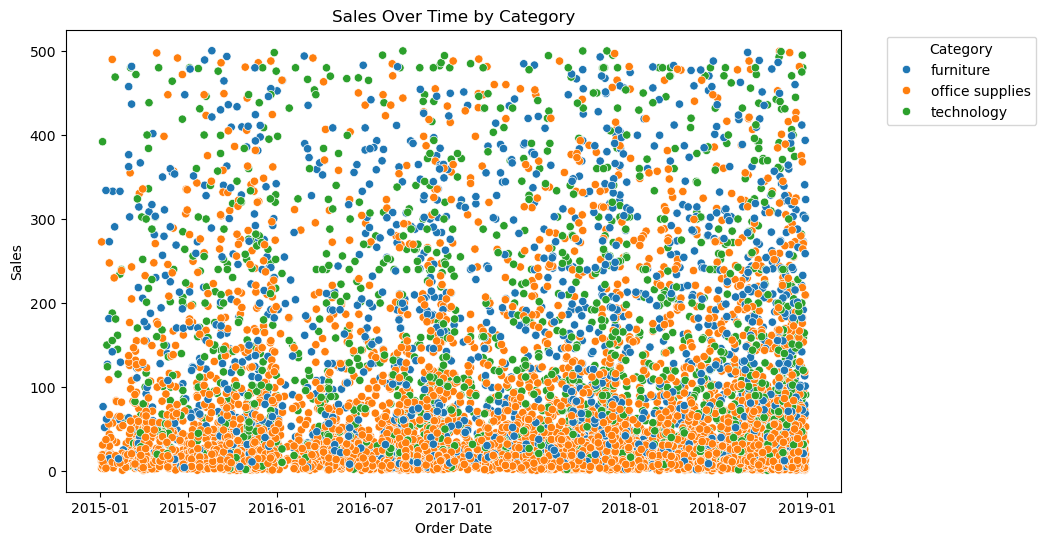

In [14]:
# Convert Order_Date to datetime if not done already
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)

# Scatter plot: Sales over Order_Date, colored by Category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order_Date', y='Sales', hue='Category', data=df)
plt.title("Sales Over Time by Category")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


3.3 Multivariate Analysis

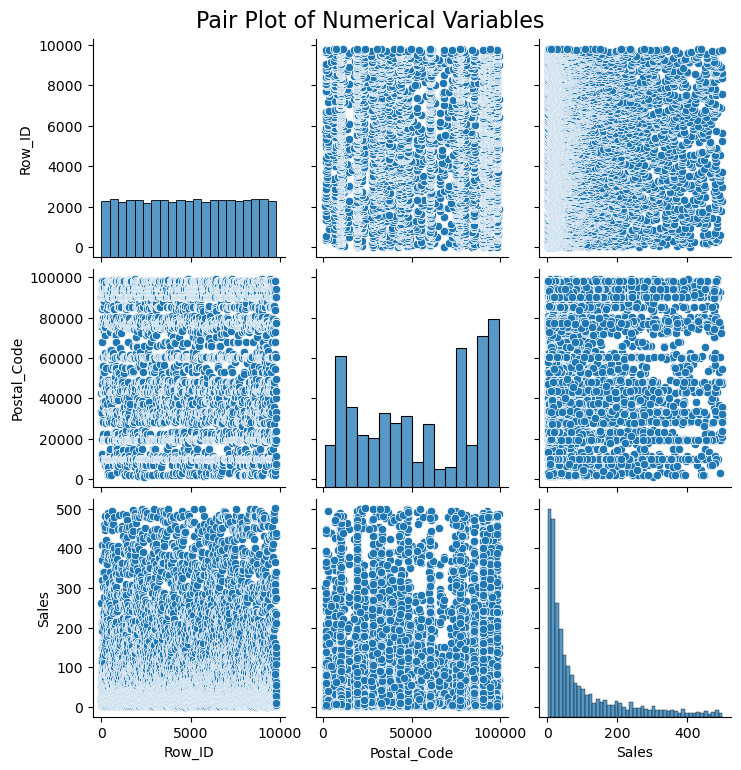

In [15]:
# Pair Plot
sns.pairplot(df[numeric_cols])
plt.suptitle("Pair Plot of Numerical Variables", fontsize=16, y=1.02)
plt.show()

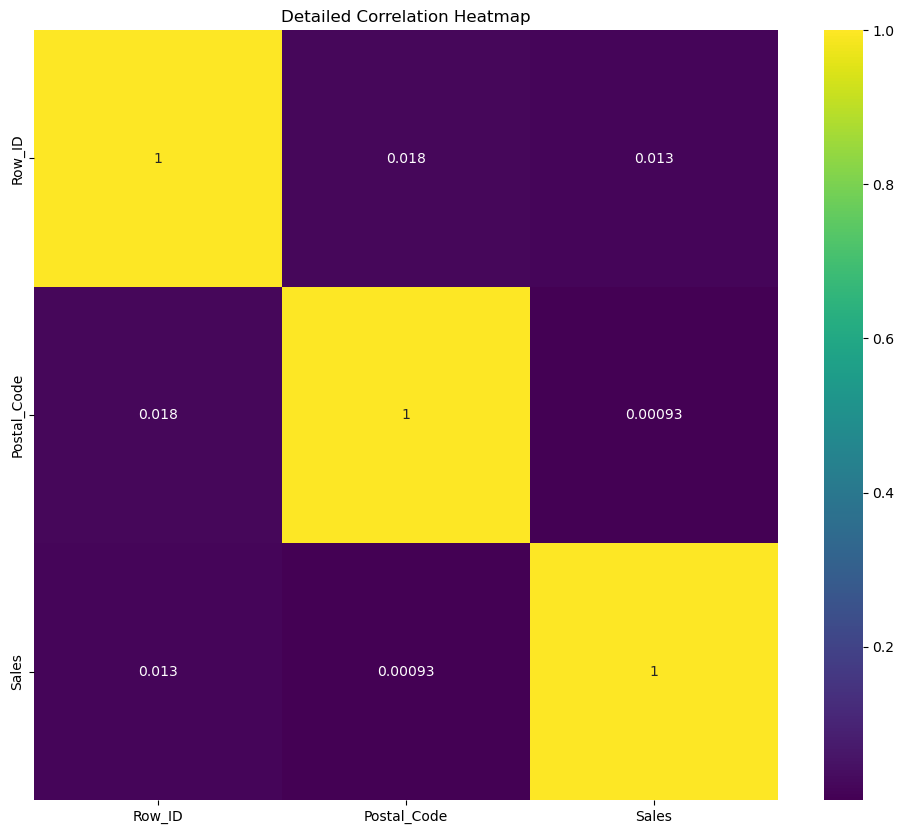

In [16]:
# Detailed Heat Map
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title("Detailed Correlation Heatmap")
plt.show()


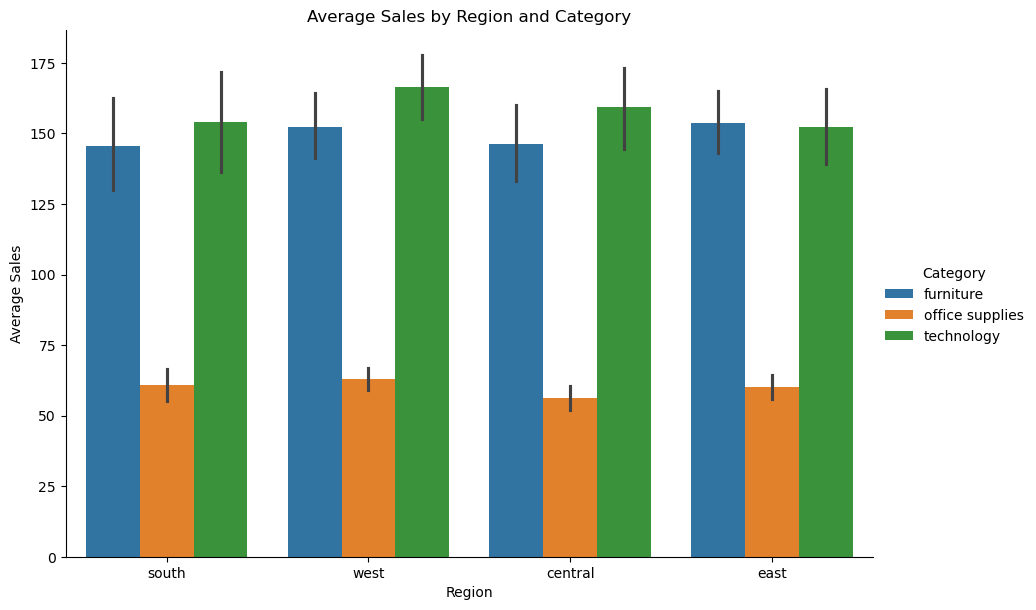

In [17]:
# Using catplot to show Average Sales by Region and Category
sns.catplot(x="Region", y="Sales", hue="Category", data=df, kind="bar", height=6, aspect=1.5)
plt.title("Average Sales by Region and Category")
plt.xlabel("Region")
plt.ylabel("Average Sales")
plt.show()



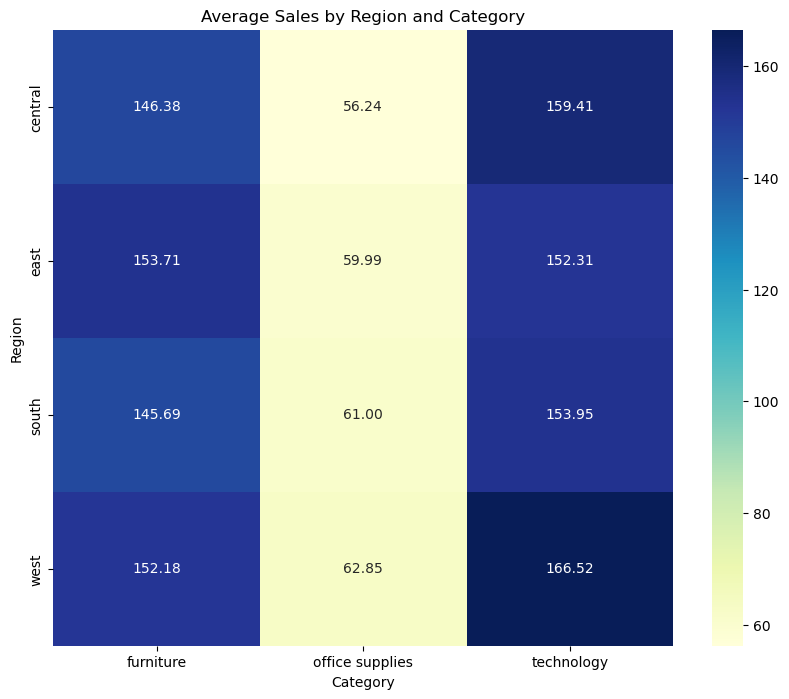

In [18]:
# Group the data by Region and Category
grouped = df.groupby(['Region', 'Category'])['Sales'].mean().reset_index()

# Create a pivot table for the heatmap
pivot_table = grouped.pivot(index='Region', columns='Category', values='Sales')

# Draw a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average Sales by Region and Category")
plt.xlabel("Category")
plt.ylabel("Region")
plt.show()


# Final Report Summary

1. Data Cleaning:
- Missing Values: Handled by imputing numerical columns with median values and categorical columns with mode.
- Duplicates: Removed duplicate records.
- Outliers: Detected and removed outliers using the IQR method.
- Categorical Standardization: Trimmed whitespace and standardized text to lower case.

2. Exploratory Data Analysis:
2.1 Univariate Analysis:
- Generated summary statistics including mean, median, mode, skewness, and variance for numerical variables.
- Visualized distributions using histograms and box plots.
- Examined frequency distributions for categorical variables.

2.2 Bivariate Analysis:
- Computed and visualized the correlation matrix.
- Explored relationships between continuous variables (e.g., Sales vs Profit).
- Compared categorical and numerical variables using box plots.

3. Multivariate Analysis:
- Utilized pair plots to visualize inter-variable relationships.
- Created detailed heatmaps for correlation insights.
- Performed grouped comparisons (e.g., Average Sales by Region and Category).

4. Conclusion:
The dataset was successfully cleaned and explored, providing insights into individual variables and their interrelationships. The visualizations support a deeper understanding of the data distribution and potential areas for further analysis.
